In [116]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader

In [117]:

labels_frame = pd.read_csv('labels.csv')
img1 = (labels_frame.iloc[0,0])
print('train/'+img1+'.jpg')
print(labels_frame.iloc[0,1])


train/000bec180eb18c7604dcecc8fe0dba07.jpg
boston_bull


In [130]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, labels = sample['image'], sample['labels']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'labels': labels}

In [131]:
class DogData(Dataset):
    
    def __init__(self, csv_file, root_dir, transform=None):
        
        self.labels_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.labels_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.labels_frame.iloc[idx, 0] +'.jpg')
        image = io.imread(img_name)
        labels = self.labels_frame.iloc[idx, 1]
        sample = {'image': image, 'labels': labels}

        if self.transform:
            sample = self.transform(sample)

        return sample
    

In [159]:
def show_dog(image, labels):
    """Show image with landmarks"""
    #plt.imshow(image)
    plt.imshow(np.transpose(sample['image'].numpy(), (1,2,0)))
    print(labels)
    plt.close

In [160]:
#load dataset
BATCH_SIZE = 4
dog_dataset = DogData(csv_file='labels.csv',
                      root_dir='train/', 
                      transform = transforms.Compose([ToTensor()]))

train_loader = torch.utils.data.DataLoader(dog_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = True)
        

In [164]:
for i in range(len(dog_dataset)):
    sample = dog_dataset[i]

    print(i, sample['image'].size(), sample['labels'])

    if i == 10:
        break

0 torch.Size([3, 375, 500]) boston_bull
1 torch.Size([3, 375, 500]) dingo
2 torch.Size([3, 375, 500]) pekinese
3 torch.Size([3, 344, 400]) bluetick
4 torch.Size([3, 500, 500]) golden_retriever
5 torch.Size([3, 375, 500]) bedlington_terrier
6 torch.Size([3, 470, 500]) bedlington_terrier
7 torch.Size([3, 227, 231]) borzoi
8 torch.Size([3, 500, 474]) basenji
9 torch.Size([3, 332, 500]) scottish_deerhound
10 torch.Size([3, 500, 375]) shetland_sheepdog


10222
boston_bull
dingo
pekinese
bluetick


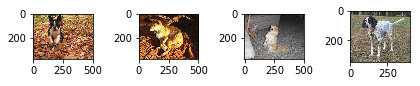

In [162]:
#test dataset
print(len(dog_dataset))
# print(dog_dataset[0].shape)

for i in range(len(dog_dataset)):
    
    sample = dog_dataset[i]

    #print(i, sample['image'].shape, sample['labels'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    #ax.set_title('Sample #{}'.format(i))
    #ax.axis('off')
    show_dog(**sample)
#     plt.imshow(np.transpose(sample['image'].numpy(), (1,2,0)))

    if i == 3:
        plt.show()
        break



dingo


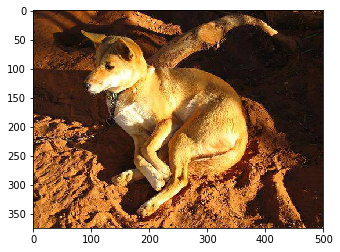

In [113]:
sample = dog_dataset[1]
show_dogs(**sample)

In [163]:
#visualize
import matplotlib.pyplot as plt

def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1,2,0)))
    
dataIter = iter(train_loader)
images, labels = dataIter.next()


print('Labels: ', labels)
print('Batch shape: ', images.size())
show_batch(images)



RuntimeError: inconsistent tensor sizes at /opt/conda/conda-bld/pytorch_1512387374934/work/torch/lib/TH/generic/THTensorMath.c:2864

In [16]:
# Hyper Parameters
num_epochs = 3
BATCH_SIZE = 100
learning_rate = .1 #0.001




dogs_data = torchvision.datasets.ImageFolder('train/')
data_loader = torch.utils.data.DataLoader(dogs_data,
                                          batch_size=4,
                                          shuffle=True)


#mnist dataset (images and label)
#download True if you don't have data
# train_dataset = dsets.MNIST(root='./data',
#                            train = True,
#                            transform=transforms.ToTensor(),
#                            download = False)

# train_loader = torch.utils.data.DataLoader(train_dataset,
#                                           batch_size = BATCH_SIZE,
#                                           shuffle = True)
# test_dataset = dsets.MNIST(root='./data',
#                            train = False,
#                            transform=transforms.ToTensor())

# test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
#                                           batch_size=BATCH_SIZE, 
#                                           shuffle=False)


RuntimeError: Found 0 images in subfolders of: train/
Supported image extensions are: .jpg,.jpeg,.png,.ppm,.bmp,.pgm